In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset.csv')
print(df.head())

                                                Text  language
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas  på eng the jesuit...   Swedish
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch


In [5]:
df.isnull().sum()

,0
Text,0
language,0


In [6]:
df['language'].nunique()

22

<Axes: xlabel='language'>

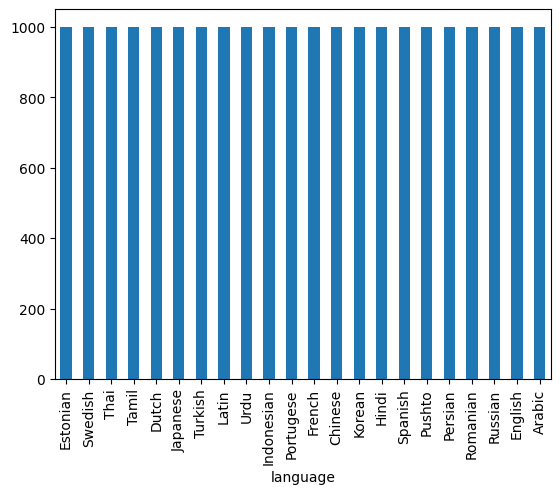

In [7]:
df['language'].value_counts().plot(kind='bar')

In [8]:
df['Text'].str.len().describe()

,Text
count,22000.000000
mean,356.033227
std,238.614087
min,8.000000
25%,187.000000
50%,274.000000
75%,441.000000
max,1341.000000


In [9]:
x = df['Text']
y = df['language']
print(y.head())

0    Estonian
1     Swedish
2        Thai
3       Tamil
4       Dutch
Name: language, dtype: object


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size=.75)

In [11]:
vectorizer = TfidfVectorizer(ngram_range=(1,3), analyzer='char')
vectorizer.fit(x_train)

TfidfVectorizer(analyzer='char', ngram_range=(1, 3))

In [12]:
x_train_vectorized = vectorizer.transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

In [16]:
clf = MultinomialNB()
clf.fit(x_train_vectorized, y_train)

MultinomialNB()

In [13]:
log_reg = LogisticRegression()
log_reg.fit(x_train_vectorized, y_train)

LogisticRegression()

In [21]:
linear_svc = LinearSVC()
linear_svc.fit(x_train_vectorized, y_train)

LinearSVC()

In [22]:
y_pred_2 = linear_svc.predict(x_test_vectorized)
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       244
     Chinese       0.99      0.99      0.99       237
       Dutch       0.98      1.00      0.99       252
     English       0.87      0.98      0.92       259
    Estonian       0.99      0.97      0.98       231
      French       0.99      1.00      0.99       248
       Hindi       1.00      0.97      0.99       238
  Indonesian       1.00      1.00      1.00       245
    Japanese       1.00      0.99      0.99       230
      Korean       1.00      0.99      1.00       262
       Latin       0.96      0.97      0.96       253
     Persian       1.00      1.00      1.00       237
   Portugese       0.99      0.97      0.98       239
      Pushto       1.00      0.96      0.98       255
    Romanian       1.00      1.00      1.00       255
     Russian       0.99      0.99      0.99       272
     Spanish       1.00      0.97      0.99       238
     Swedish       0.99    

In [14]:
y_pred = log_reg.predict(x_test_vectorized)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       244
     Chinese       0.99      0.99      0.99       237
       Dutch       0.96      0.98      0.97       252
     English       0.81      0.98      0.89       259
    Estonian       0.99      0.97      0.98       231
      French       0.99      0.99      0.99       248
       Hindi       1.00      0.97      0.99       238
  Indonesian       1.00      1.00      1.00       245
    Japanese       1.00      0.98      0.99       230
      Korean       1.00      0.99      1.00       262
       Latin       0.96      0.93      0.94       253
     Persian       1.00      1.00      1.00       237
   Portugese       0.98      0.94      0.96       239
      Pushto       1.00      0.96      0.98       255
    Romanian       1.00      0.99      1.00       255
     Russian       0.99      0.99      0.99       272
     Spanish       0.99      0.97      0.98       238
     Swedish       1.00    

In [17]:
y_pred_1 = clf.predict(x_test_vectorized)
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       244
     Chinese       0.99      0.98      0.99       237
       Dutch       0.97      0.97      0.97       252
     English       0.74      1.00      0.85       259
    Estonian       1.00      0.96      0.98       231
      French       0.97      1.00      0.98       248
       Hindi       1.00      0.97      0.99       238
  Indonesian       1.00      0.98      0.99       245
    Japanese       1.00      0.97      0.98       230
      Korean       1.00      0.99      1.00       262
       Latin       0.99      0.90      0.94       253
     Persian       1.00      1.00      1.00       237
   Portugese       0.99      0.92      0.95       239
      Pushto       1.00      0.96      0.98       255
    Romanian       1.00      0.99      0.99       255
     Russian       0.99      0.99      0.99       272
     Spanish       0.98      0.97      0.97       238
     Swedish       1.00    

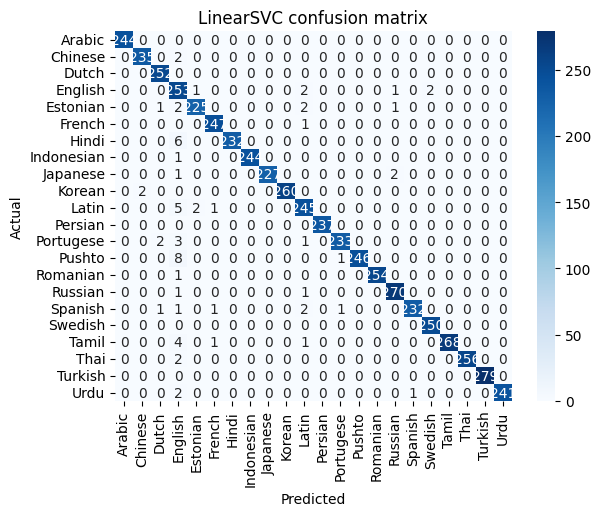

In [23]:
y_pred_2 = linear_svc.predict(x_test_vectorized)
confusion_matrix(y_test, y_pred_2)
cm_2 = confusion_matrix(y_test, y_pred_2, labels=linear_svc.classes_)
sns.heatmap(cm_2, annot=True, fmt='d', cmap='Blues', xticklabels=linear_svc.classes_, yticklabels=linear_svc.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LinearSVC confusion matrix')
plt.show()

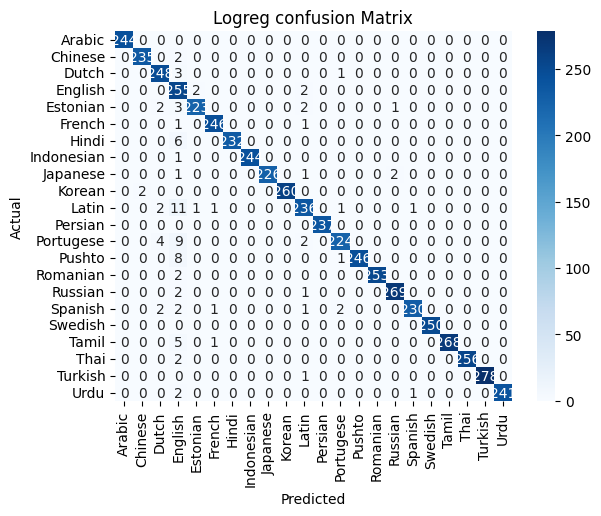

In [18]:
y_pred = log_reg.predict(x_test_vectorized)
confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=log_reg.classes_, yticklabels=log_reg.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logreg confusion Matrix')
plt.show()

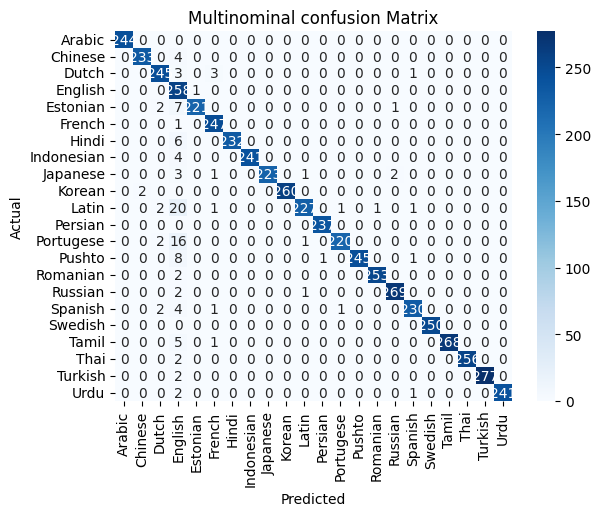

In [19]:
y_pred_1 = clf.predict(x_test_vectorized)
confusion_matrix(y_test, y_pred_1)
cm_1 = confusion_matrix(y_test, y_pred_1, labels=clf.classes_)
sns.heatmap(cm_1, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Multinominal confusion Matrix')
plt.show()